# PCA  & Feature Engineering

- Loads preprocessed training & testing datasets

- Defines feature groups for PCA transformation (e.g. economic, political-social)

- Applies PCA on each group to reduce dimensionality & generate composite indexes

- Selects the first principal component (PC1) as the representative index for each group

- Visualises explained variance to justify component selection

- Adds PCA-based features (indexes) to the dataset

- Saves the transformed datasets with new PCA features for future use

In [5]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Read the dataset
df = pd.read_csv('combined_features_removed.csv')

In [7]:
# View the first few rows of the dataset
df.head()

,country,year,Effective Parliament (highest score=1),Election free and fair (highest score=1),Election government intimidation (highest score=1),Voter turnout (highest score=1),Fair trial (highest score=1),Judicial Independence (highest score=1),Predictable Enforcement (highest score=1),Freedom of Religion (highest score=1),...,Infant mortality rate (highest score=1),Life expectancy (highest score=1),Mean years of schooling (highest score=1),Human Development Index,Urban population (% of total population),Gini coefficient,GDP,Free and fair elections index,Liberal democracy index,ethnicity_ratio
0,Australia,1990,0.85,0.82,0.85,0.82,1.0,1.0,0.9,0.98,...,0.97,0.90,0.39,0.864,85.433,0.437959,2.057392,0.956,0.852,0.84
1,Australia,1991,0.85,0.82,0.85,0.82,1.0,1.0,0.9,0.98,...,0.97,0.90,0.39,0.866,85.403,0.449667,-1.643571,0.956,0.852,0.84
2,Australia,1992,0.85,0.82,0.85,0.82,1.0,1.0,0.9,0.98,...,0.97,0.90,0.39,0.868,85.285,0.444478,-0.690437,0.956,0.852,0.84
3,Australia,1993,0.85,0.82,0.85,0.84,1.0,1.0,0.9,0.98,...,0.98,0.91,0.40,0.873,85.157,0.451112,3.123738,0.958,0.852,0.84
4,Australia,1994,0.85,0.82,0.85,0.84,1.0,1.0,0.9,0.98,...,0.98,0.91,0.40,0.873,85.028,0.455326,2.983092,0.958,0.852,0.84


In [8]:
# Print the unique values in the 'country' column
df['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'South Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States'], dtype=object)

In [ ]:
# Drop the 'country' and 'year' columns
X = df.drop(columns=['country', 'year'])

In [9]:
# Produce the correlation matrix
correlation_matrix = X.corr()
correlation_matrix

,Effective Parliament (highest score=1),Election free and fair (highest score=1),Election government intimidation (highest score=1),Voter turnout (highest score=1),Fair trial (highest score=1),Judicial Independence (highest score=1),Predictable Enforcement (highest score=1),Freedom of Religion (highest score=1),Free Political Parties (highest score=1),Harassment of journalists (highest score=1),...,Infant mortality rate (highest score=1),Life expectancy (highest score=1),Mean years of schooling (highest score=1),Human Development Index,Urban population (% of total population),Gini coefficient,GDP,Free and fair elections index,Liberal democracy index,ethnicity_ratio
Effective Parliament (highest score=1),1.000000,0.502074,0.577229,0.171929,0.555646,0.625522,0.721930,0.394452,0.478168,0.552470,...,0.452156,0.366535,0.403136,0.437071,0.231189,-0.254417,-0.100529,0.598689,0.724082,-0.040493
Election free and fair (highest score=1),0.502074,1.000000,0.773186,0.101894,0.425888,0.430828,0.493227,0.288877,0.479619,0.528285,...,0.435203,0.378276,0.280056,0.323676,0.119036,-0.271908,-0.079021,0.785408,0.723389,0.003269
Election government intimidation (highest score=1),0.577229,0.773186,1.000000,0.016822,0.612972,0.550801,0.609099,0.366464,0.558421,0.649284,...,0.474720,0.401317,0.357354,0.406774,0.065922,-0.317946,-0.082819,0.838747,0.817840,0.028495
Voter turnout (highest score=1),0.171929,0.101894,0.016822,1.000000,0.068878,0.028798,0.158077,-0.063070,0.022503,0.042654,...,0.087336,0.137873,0.013547,0.052641,0.239500,-0.272769,-0.070266,0.167387,0.103003,0.127476
Fair trial (highest score=1),0.555646,0.425888,0.612972,0.068878,1.000000,0.638165,0.754134,0.491823,0.573090,0.640928,...,0.631586,0.547663,0.555158,0.641876,0.214155,-0.458323,-0.105783,0.636890,0.742846,0.055172
Judicial Independence (highest score=1),0.625522,0.430828,0.550801,0.028798,0.638165,1.000000,0.700103,0.478364,0.456646,0.668414,...,0.382424,0.291271,0.375255,0.412073,0.106645,-0.398137,-0.041842,0.587277,0.757661,0.120519
Predictable Enforcement (highest score=1),0.721930,0.493227,0.609099,0.158077,0.754134,0.700103,1.000000,0.501297,0.562350,0.699342,...,0.555074,0.450717,0.561479,0.612888,0.345325,-0.541844,-0.113322,0.674813,0.781120,-0.009268
Freedom of Religion (highest score=1),0.394452,0.288877,0.366464,-0.063070,0.491823,0.478364,0.501297,1.000000,0.422736,0.379155,...,0.415198,0.124631,0.220023,0.249458,0.090447,-0.286006,-0.007819,0.403681,0.563877,0.172963
Free Political Parties (highest score=1),0.478168,0.479619,0.558421,0.022503,0.573090,0.456646,0.562350,0.422736,1.000000,0.558711,...,0.500042,0.364671,0.258785,0.399023,-0.106437,-0.452308,-0.122774,0.616110,0.685660,0.145158
Harassment of journalists (highest score=1),0.552470,0.528285,0.649284,0.042654,0.640928,0.668414,0.699342,0.379155,0.558711,1.000000,...,0.484308,0.236395,0.461887,0.436470,-0.005183,-0.536822,-0.050556,0.665232,0.791701,0.031431


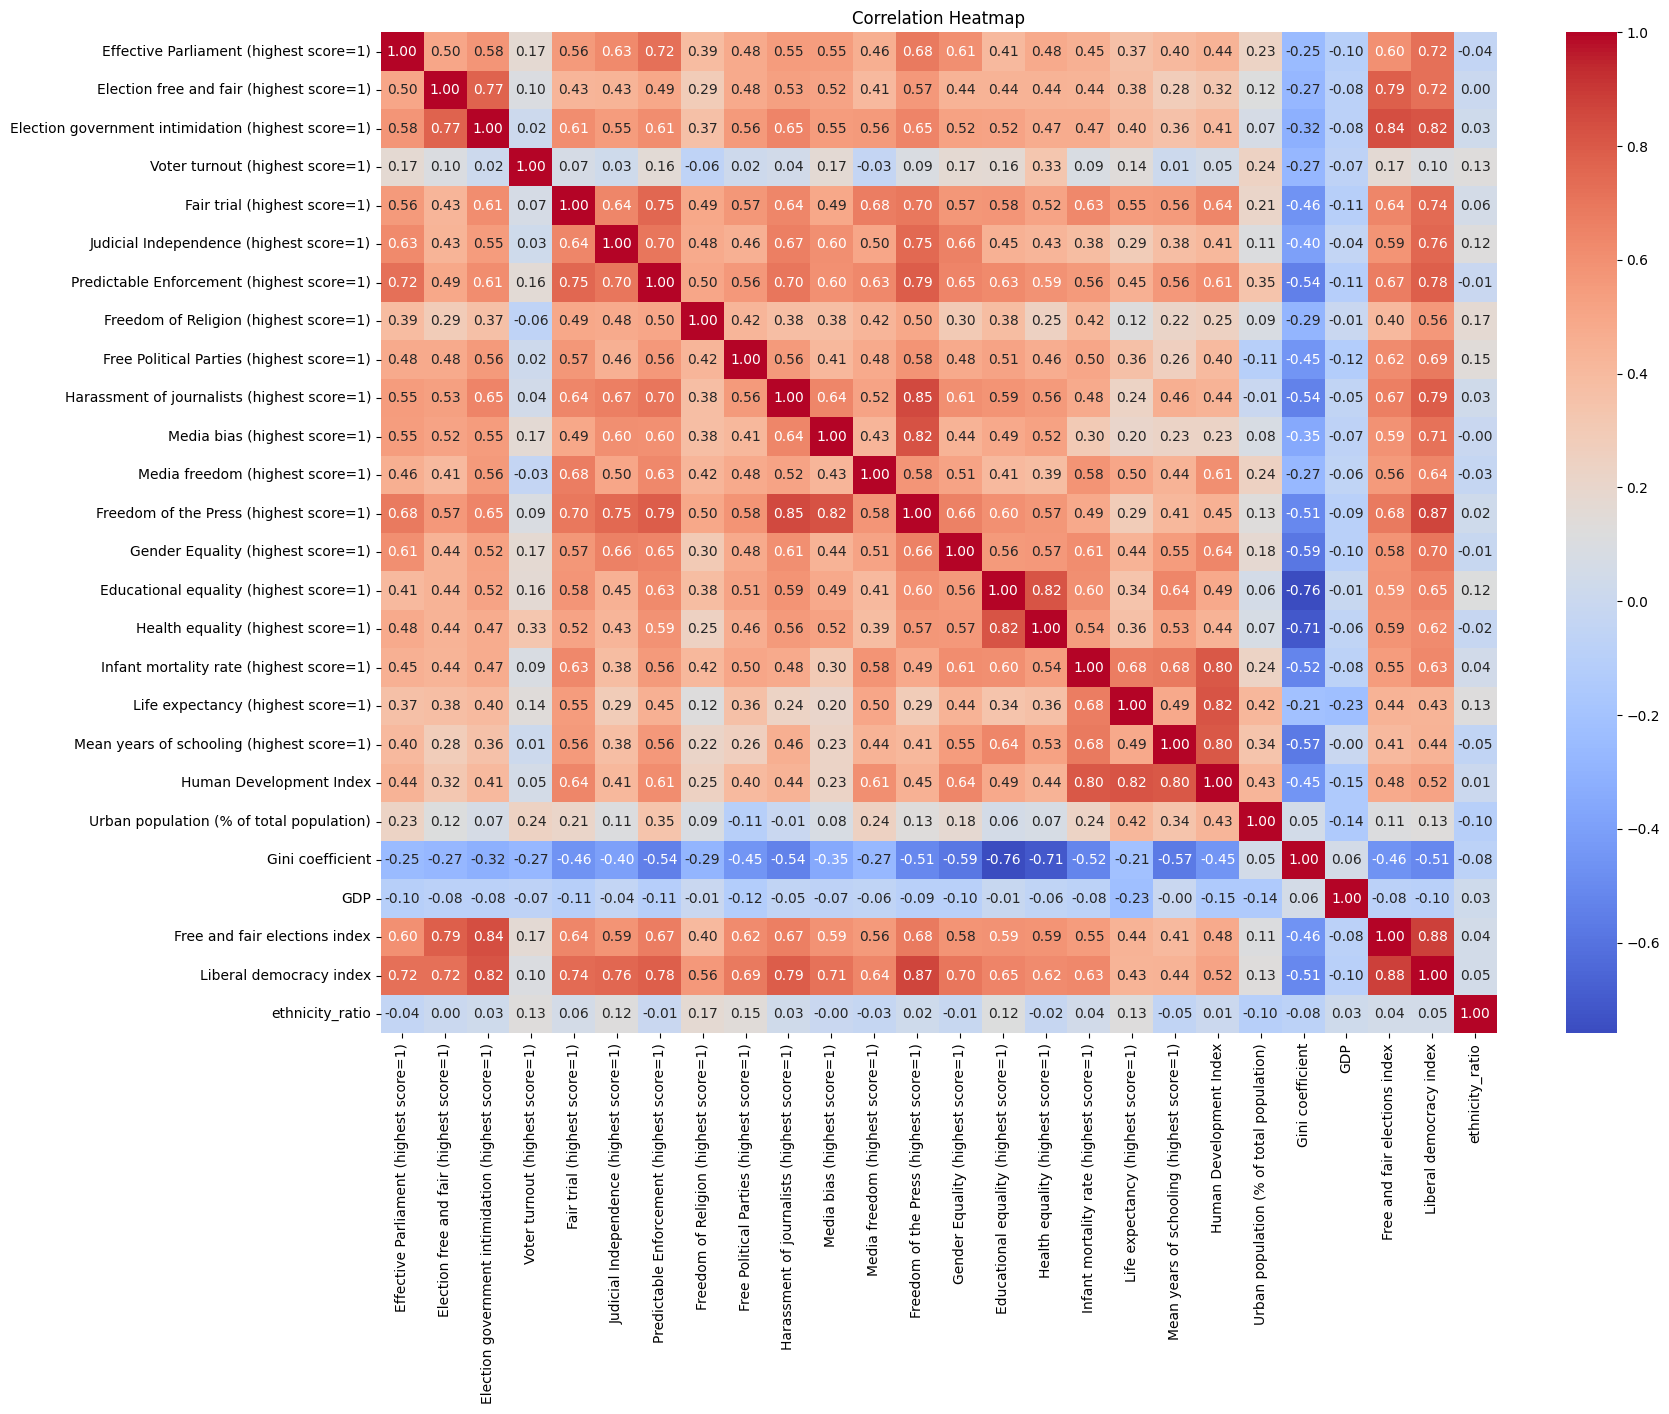

In [10]:
# Create a heatmap of correlations
plt.figure(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Print the columns names
print(correlation_matrix.columns)

Index(['Effective Parliament (highest score=1)',
       'Election free and fair (highest score=1)',
       'Election government intimidation (highest score=1)',
       'Voter turnout (highest score=1)', 'Fair trial (highest score=1)',
       'Judicial Independence (highest score=1)',
       'Predictable Enforcement (highest score=1)',
       'Freedom of Religion (highest score=1)',
       'Free Political Parties (highest score=1)',
       'Harassment of journalists (highest score=1)',
       'Media bias (highest score=1)', 'Media freedom (highest score=1)',
       'Freedom of the Press (highest score=1)',
       'Gender Equality (highest score=1)',
       'Educational equality (highest score=1)',
       'Health equality (highest score=1)',
       'Infant mortality rate (highest score=1)',
       'Life expectancy (highest score=1)',
       'Mean years of schooling (highest score=1)', 'Human Development Index',
       'Urban population (% of total population)', 'Gini coefficient', 'GDP',

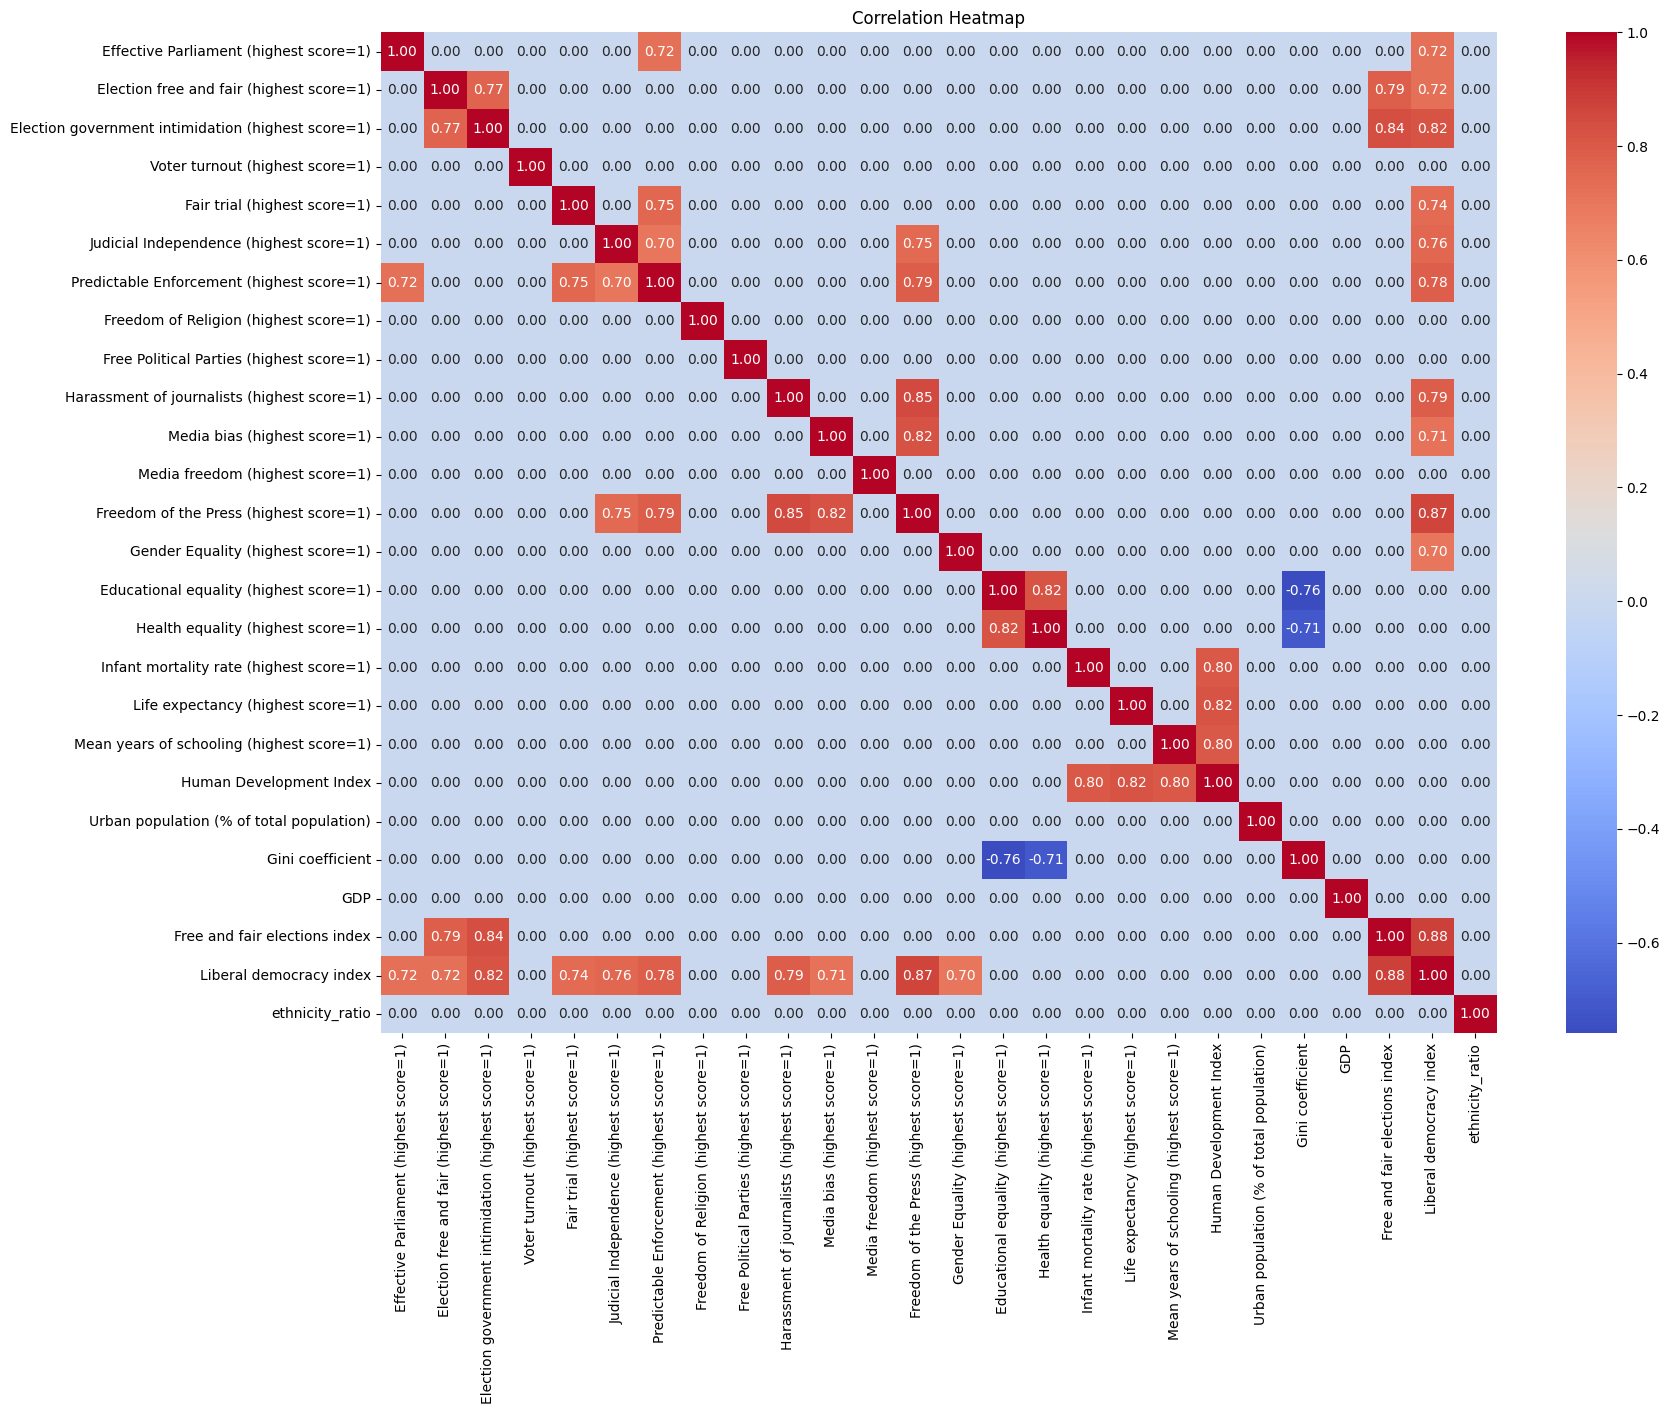

In [12]:
# Create a second heatmap of correlations
important_corr = correlation_matrix[abs(correlation_matrix) > 0.7].fillna(0)
plt.figure(figsize=(18, 13))
sns.heatmap(important_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

### PCA function

In [13]:
# PCA function that takes dataframe, selected columns, and number of pca components, adding pca components to dataframe with new names provided
def pca_function(df, selected_columns, n_components, new_column_names):
    df_pca = df[selected_columns].copy()
    
    pca = PCA(n_components=n_components)
    df_pca_transformed = pca.fit_transform(df_pca)
    
    # PCA result to dataframe
    df_pca_transformed = pd.DataFrame(df_pca_transformed, columns=new_column_names)
    df = pd.concat([df, df_pca_transformed], axis=1)
    
    # save PCA component
    pca_info = pd.DataFrame(pca.components_, columns=df_pca.columns, index=new_column_names)
    
    # print explained variance
    explained_variance = pca.explained_variance_ratio_
    for i, var in enumerate(explained_variance):
        print(f"Explained variance for component {i+1}: {var:.3f}")
    
    # Adjust the sign of the PCA results (check the correlation of the first principal component with the selected features)
    for new_feature, component in zip(new_column_names, pca.components_):
        most_influential_feature = selected_columns[np.argmax(np.abs(component))]  # 비교할 대표 feature
        correlation = np.corrcoef(df[most_influential_feature], df[new_feature])[0, 1]
        
        if correlation < 0:
            df[new_feature] *= -1  # sign change if needed
            print(f"{new_feature} sign reversed (correlation coefficient: {most_influential_feature}: {correlation:.3f})")
    
    # delete selected columns
    df = df.drop(columns=selected_columns)
    
    return df, pca_info

In [14]:
# Comparison between indexes made after pca and pca-targetted groups
def comparison (df_before, df_after, original_features, pca_feature):
    countries = df_before['country'].unique()
    
    for country in countries:
        plt.figure(figsize=(12, 6))
        country_before = df_before[df_before['country'] == country]
        country_after = df_after[df_after['country'] == country]
        
        for feature in original_features:
            plt.plot(country_before['year'], country_before[feature], marker='o', linestyle='-', label=f'Original {feature}')
        
        plt.plot(country_after['year'], country_after[pca_feature], marker='s', linestyle='--', color='red', label=f'PCA {pca_feature}')
        
        plt.xlabel('year')
        plt.ylabel('Feature Value')
        plt.title(f'{country} - original vs new index after PCA')
        plt.legend()
        plt.grid(True)
        plt.show()

In [22]:
# Comparison of mean of the countries in each year and the new index mean in each year
def mean_comparison (df_before, df_after, original_features, pca_feature):
    var_name = [name for name in globals() if globals()[name] is original_features][0]
    mean_before = df_before.groupby('year')[original_features].mean()
    mean_after = df_after.groupby('year')[pca_feature].mean()
    
    plt.figure(figsize=(12, 6))
    for feature in original_features:
        plt.plot(mean_before.index, mean_before[feature], marker='o', linestyle='-', label=f'Mean of Original Feature: {feature}')
    plt.plot(mean_after.index, mean_after, marker='s', linestyle='--', color='red', label=f'Mean of PCA Feature: {pca_feature}')
    
    plt.xlabel('year')
    plt.ylabel('Mean Value')
    plt.title(f'Yearly Mean Comparison of {var_name}: Original vs PCA')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

### Economic Stability Index

In [16]:
# Create an economic stability index
economic_columns = [
    "Gini coefficient",
    "GDP",
]

df_1, pca_info_economic = pca_function(df, selected_columns=economic_columns, n_components=1, new_column_names=["economic_stability_index"])
print(df_1["economic_stability_index"].describe())
print(pca_info_economic)  

Explained variance for component 1: 0.999
count    1.258000e+03
mean    -4.518555e-17
std      3.353457e+00
min     -1.657388e+01
25%     -1.356740e+00
50%     -2.643998e-02
75%      1.679533e+00
max      2.119512e+01
Name: economic_stability_index, dtype: float64
                          Gini coefficient       GDP
economic_stability_index           0.00164  0.999999


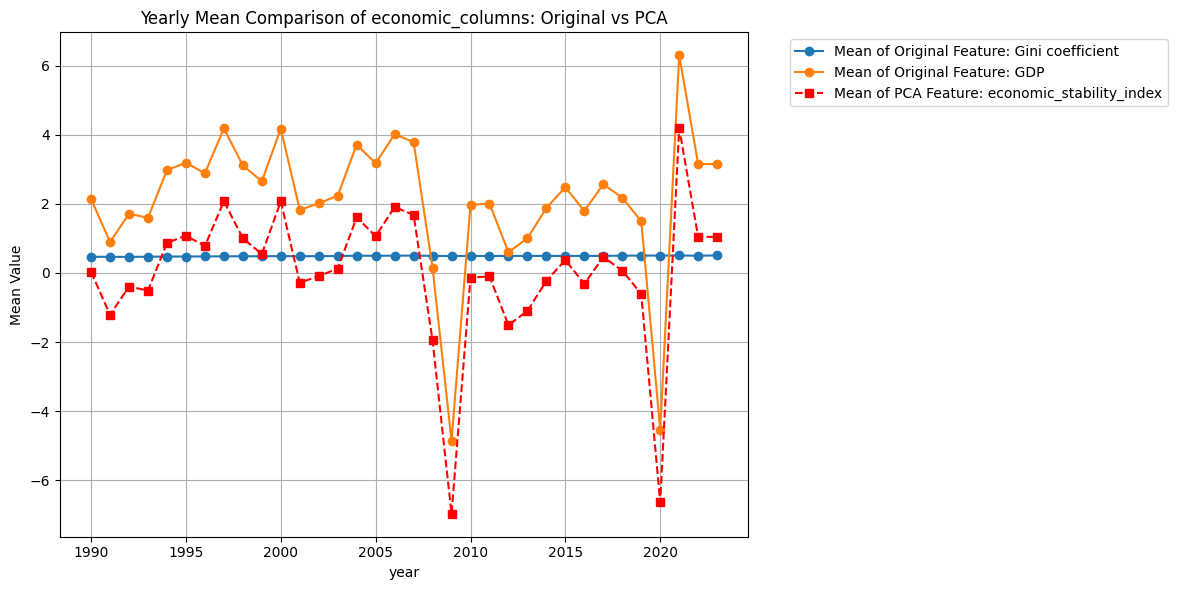

In [17]:
# Comparison of mean of the countries in each year and the new index mean in each year
mean_comparison(df, df_1, original_features=economic_columns, pca_feature="economic_stability_index")

### Political and Social Index

In [18]:
# Create a political and social index
political_social_features = [
    "Effective Parliament (highest score=1)",
    "Election free and fair (highest score=1)",
    "Election government intimidation (highest score=1)",
    "Fair trial (highest score=1)",
    "Judicial Independence (highest score=1)",
    "Predictable Enforcement (highest score=1)",
    "Free Political Parties (highest score=1)",
    "Harassment of journalists (highest score=1)",
    "Media bias (highest score=1)",
    "Media freedom (highest score=1)",
    "Freedom of the Press (highest score=1)",
    "Free and fair elections index",
    "Liberal democracy index",
    "Gender Equality (highest score=1)",
    "Educational equality (highest score=1)",
    "Health equality (highest score=1)",
    "Infant mortality rate (highest score=1)",
    "Life expectancy (highest score=1)",
    "Mean years of schooling (highest score=1)",
    "Human Development Index"
]

df_2, pca_info_social = pca_function(df_1, selected_columns=political_social_features, n_components=1, new_column_names=["political_social_index"])

print(df_2["political_social_index"].describe())
print(pca_info_social)

Explained variance for component 1: 0.625
political_social_index sign reversed (correlation coefficient: Media freedom (highest score=1): -0.835)
count    1.258000e+03
mean    -1.073157e-16
std      4.512038e-01
min     -1.752952e+00
25%     -1.190868e-01
50%      1.572584e-01
75%      2.634935e-01
max      5.850421e-01
Name: political_social_index, dtype: float64
                        Effective Parliament (highest score=1)  \
political_social_index                               -0.179299   

                        Election free and fair (highest score=1)  \
political_social_index                                  -0.10943   

                        Election government intimidation (highest score=1)  \
political_social_index                                          -0.143404    

                        Fair trial (highest score=1)  \
political_social_index                     -0.385888   

                        Judicial Independence (highest score=1)  \
political_social_index    

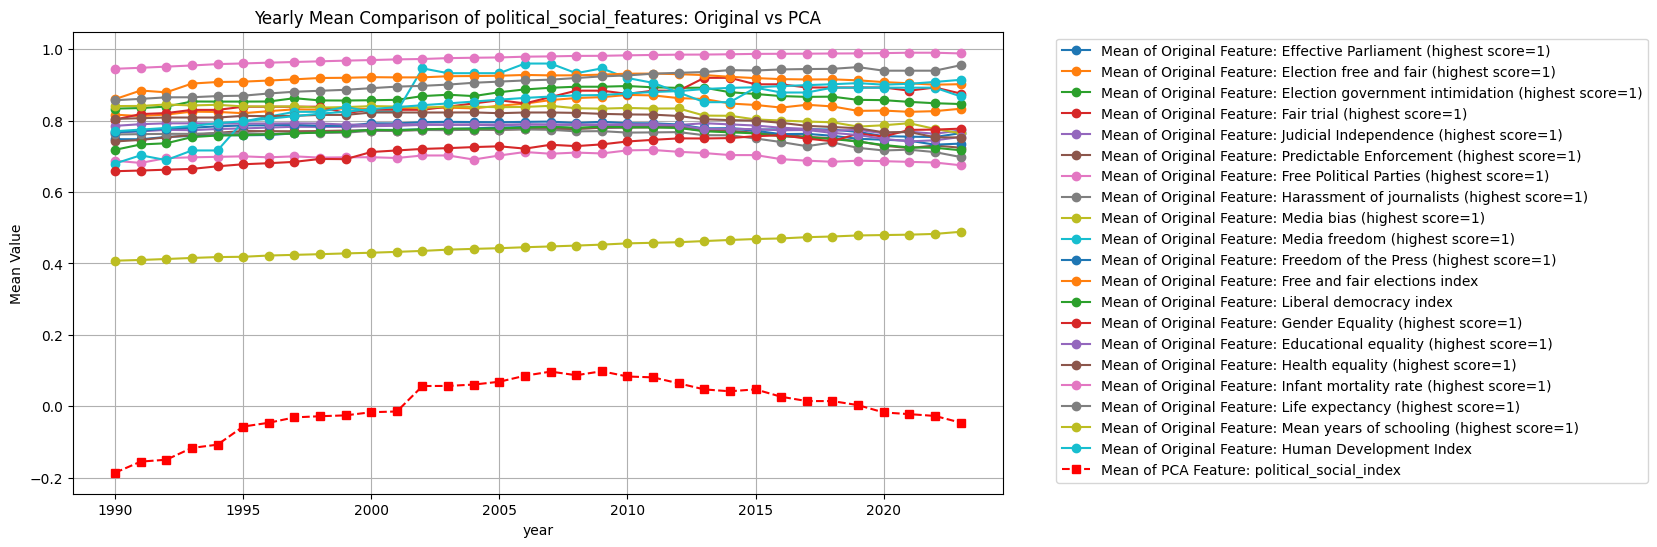

In [24]:
# Comparison of mean of the countries in each year and the new index mean in each year
mean_comparison(df_1, df_2, original_features=political_social_features, pca_feature="political_social_index")

### Check new correlation matrix

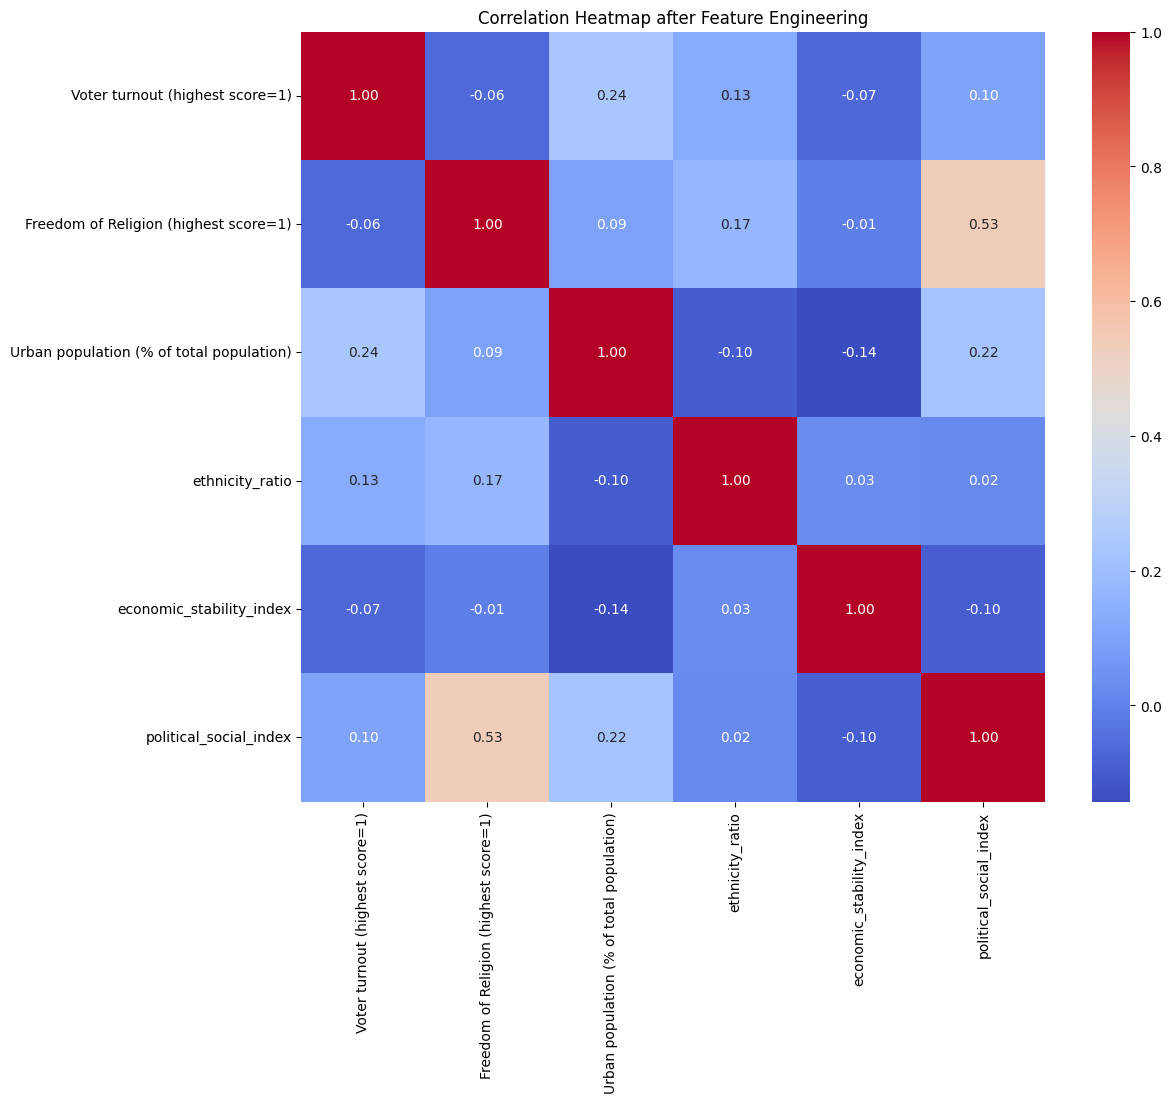

In [16]:
# New correlation matrix
X=df_2.drop(columns=['country', 'year'])
correlation_matrix = X.corr()
correlation_matrix

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap after Feature Engineering')
plt.show()

### No distinct correlation (over 0.7) among all features!

In [19]:
# Save the transformed datasets with new PCA features for future use
df_2.to_csv('after_PCA_annual.csv', index=False)